In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from itertools import chain

In [7]:
data = pd.read_csv('/content/netflix_data.csv')
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## What type of content is available in different countries ??

In [12]:
data['country'] = data['country'].fillna('Unknown')

In [14]:
top_countries = data['country'].value_counts().head(10)
top_countries

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


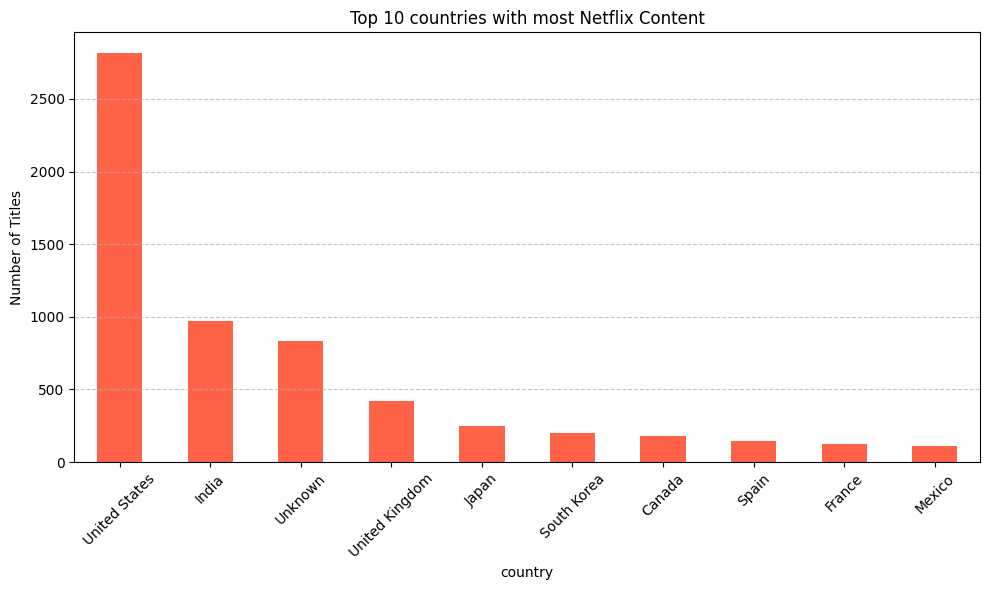

In [15]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar' , color='tomato')
plt.title("Top 10 countries with most Netflix Content")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

## How has the number of movies released per year changed over the last 20-30 years?

In [17]:
data['release_year'] = pd.to_numeric(data['release_year'],errors='coerce')

In [20]:
movies = data[data['type'] == 'Movie']
movies_per_year = movies.groupby('release_year').size()
movies_per_year = movies_per_year[movies_per_year.index >= 1995]

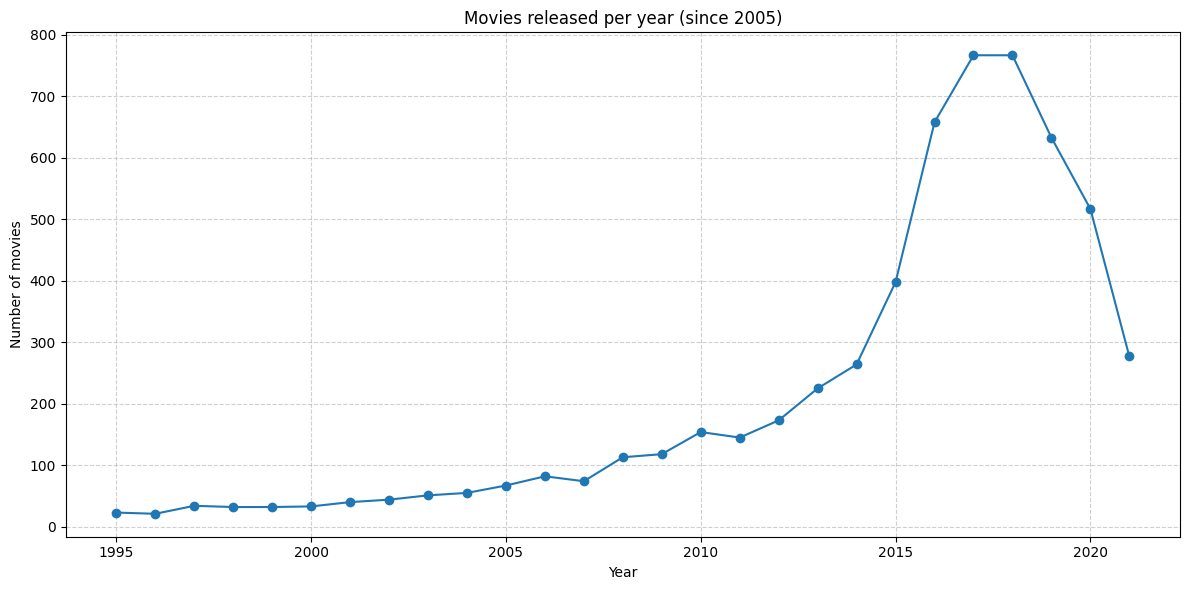

In [25]:
plt.figure(figsize=(12,6))
movies_per_year.plot(kind='line',marker='o')
plt.title('Movies released per year (since 2005)')
plt.xlabel("Year")
plt.ylabel('Number of movies')
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Comparison of tv shows vs. movies.

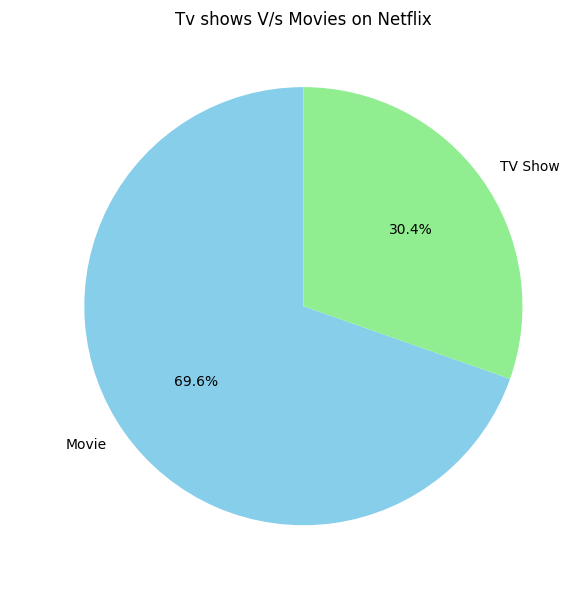

In [29]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(6,6))
type_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['skyblue','lightgreen'])
plt.title("Tv shows V/s Movies on Netflix")
plt.ylabel(" ")
plt.tight_layout()
plt.show()

## What is the best time to launch a TV show?

In [30]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [31]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [32]:
data['date_added'] = pd.to_datetime(data['date_added'],errors='coerce')

In [34]:
data['month_added'] = data['date_added'].dt.month

In [35]:
tv_shows = data[data['type'] == 'TV Show']

In [36]:
tv_by_month = tv_shows['month_added'].value_counts().sort_index()

In [37]:
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


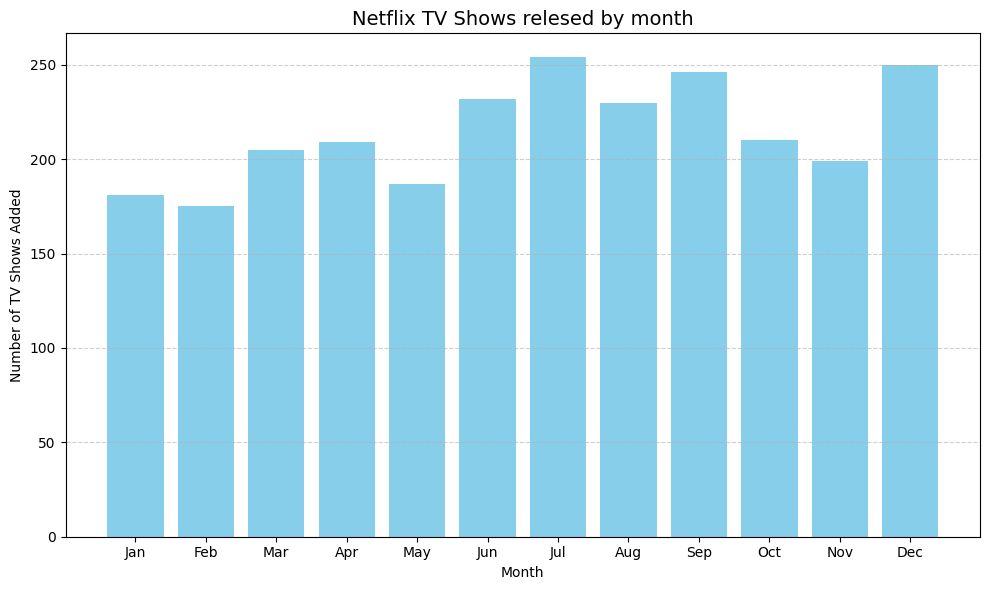

In [40]:
plt.figure(figsize=(10,6))
plt.bar(month_names, tv_by_month.values,color='skyblue')
plt.title("Netflix TV Shows relesed by month",fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Analysis of actors/directors of different types of shows/movies.

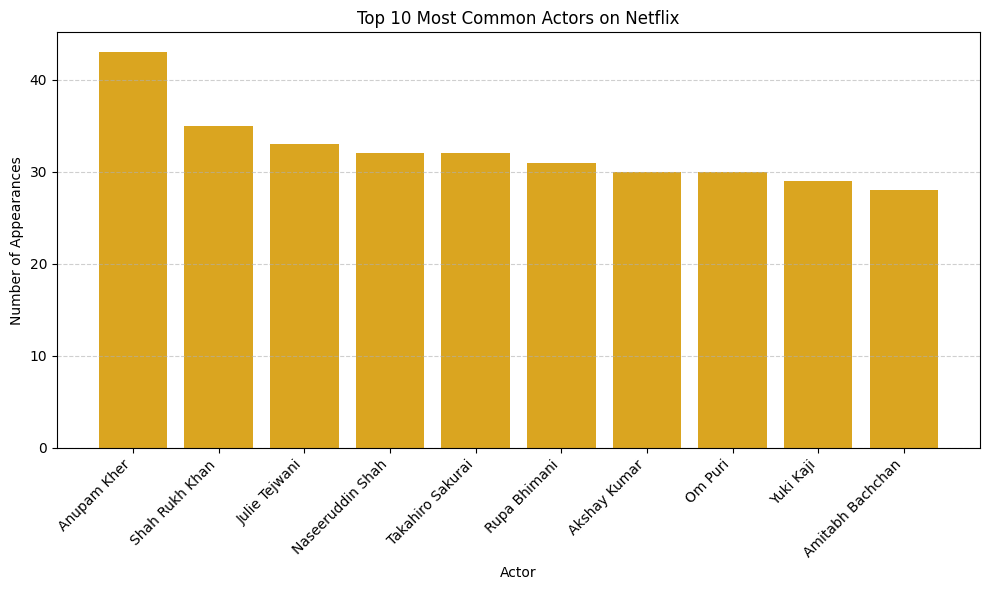

In [41]:
data['cast'] = data['cast'].fillna('')
actor_counts = Counter(chain.from_iterable([x.split(', ') for x in data['cast'] if x]))
top_actors = dict(actor_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_actors.keys(), top_actors.values(), color='goldenrod')
plt.title('Top 10 Most Common Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Does Netflix has more focus on TV Shows than movies in recent years?

<Figure size 1200x600 with 0 Axes>

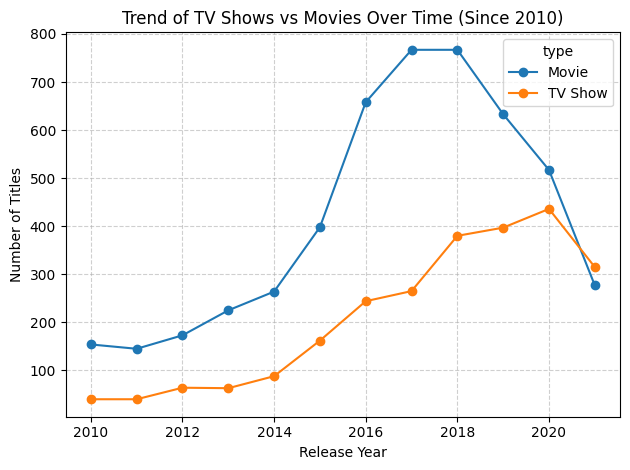

In [42]:
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
content_by_year = data.groupby(['release_year', 'type']).size().unstack().fillna(0)
recent_content = content_by_year[content_by_year.index >= 2010]

plt.figure(figsize=(12, 6))
recent_content.plot(kind='line', marker='o')
plt.title('Trend of TV Shows vs Movies Over Time (Since 2010)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Understanding what content is available in different countries.

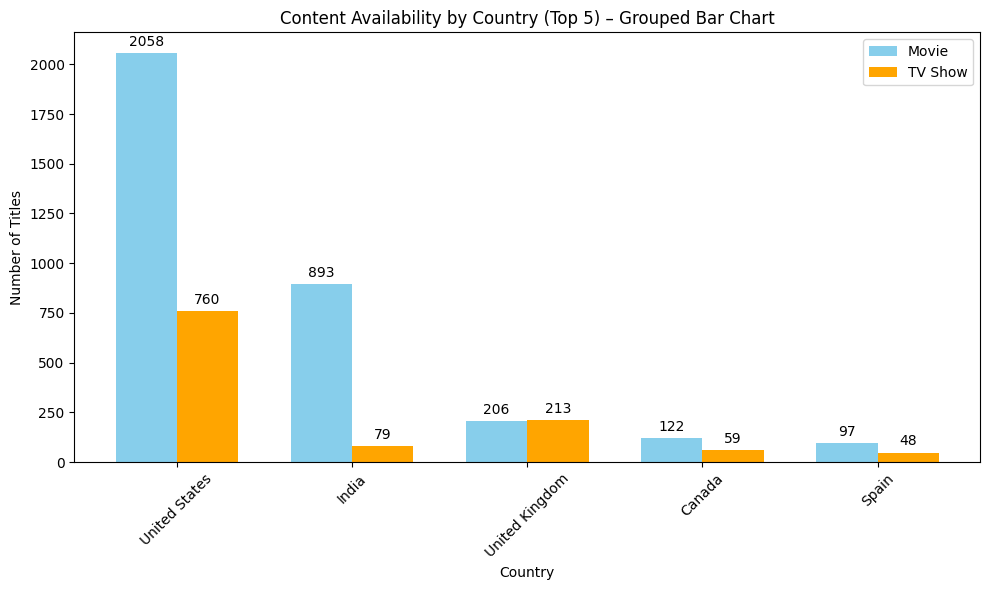

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Clean country column
data = data[data['country'].notna() & (data['country'].str.strip() != '')]
data = data[~data['country'].str.lower().isin(['unknown'])]

# ✅ Step 2: Strip whitespace and fix type casing
data['country'] = data['country'].str.strip()
data['type'] = data['type'].str.strip().str.title()  # Ensures "TV Show" not "Tv Show"

# ✅ Step 3: Group by country and type
country_type_counts = data.groupby(['country', 'type']).size().unstack().fillna(0)

# ✅ Step 4: Filter only countries having both Movies & TV Shows
filtered = country_type_counts[(country_type_counts['Movie'] > 0) & (country_type_counts['Tv Show'] > 0)]

# ✅ Step 5: Pick top 5 countries with most Movies
top5 = filtered.sort_values(by='Movie', ascending=False).head(5)

# ✅ Step 6: Extract values for plotting
labels = top5.index.tolist()
movie_counts = top5['Movie'].tolist()
tv_counts = top5['Tv Show'].tolist()

# ✅ Step 7: Plot grouped bar chart
x = np.arange(len(labels))  # positions for bars
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, movie_counts, width, label='Movie', color='skyblue')
bars2 = ax.bar(x + width/2, tv_counts, width, label='TV Show', color='orange')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_title('Content Availability by Country (Top 5) – Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# ✅ Add bar labels above each bar
ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

plt.tight_layout()
plt.show()


